<a href="https://colab.research.google.com/github/mariyam-ahmed/portfolio/blob/main/Property_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Executive Summary
This project aims to create a statistical model that can predict the sale price of a real estate property. The dataset used for training the model contains 80 variables and 1000 instances.

Data processing ensures the dataset is usable by the model for training. First, a log transform was applied to the response variable, Sale Price, to normalize its distribution. Next, string variables were categorized as nominal or ordinal and handled accordingly, which is expanded upon in the respective subsections. Finally, rows with missing values are dropped. One result of data pre-processing was an increase in the number of variables (over 200).

The model used in this analysis was linear regression calculated using ordinary least squares. However, to ensure that the large number of variables in the dataset would not lead to redundancy or overfitting, a number of variable selection methods were employed. First, the correlation coefficient between variables was calculated, and those with large correlations with other variables were dropped. Next, a forward selection algorithm was used to find the ideal set of variables that generates the lowest error on a validation set. This set of variables was then used to train the linear model. Finally, the trained model is used to predict values for the test set as provided for this project and a list of values is produced.

#Data Exploration

In [ ]:
#loading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from google.colab import drive

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#removing unnecessary columns
df = df.drop('patient_nbr', axis=1)
df = df.drop('encounter_id', axis=1)
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
for col in df:
    print(df[col].name, df[col].dtype)
    print("Unique:", len(df[col].unique()))
    print(df[col].unique())
    print("-------------------------------------------------------------------------------------------------------")

race object
Unique: 6
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
-------------------------------------------------------------------------------------------------------
gender object
Unique: 3
['Female' 'Male' 'Unknown/Invalid']
-------------------------------------------------------------------------------------------------------
age object
Unique: 10
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
-------------------------------------------------------------------------------------------------------
weight object
Unique: 10
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
-------------------------------------------------------------------------------------------------------
admission_type_id int64
Unique: 8
[6 1 2 3 4 5 8 7]
-------------------------------------------------------------------------------------------------------
discharge_disposition_id int64


### Plots of Sales Price

count      1000.000000
mean     178403.271000
std       71476.841901
min       52500.000000
25%      128987.500000
50%      162000.000000
75%      214000.000000
max      485000.000000
Name: SalePrice, dtype: float64


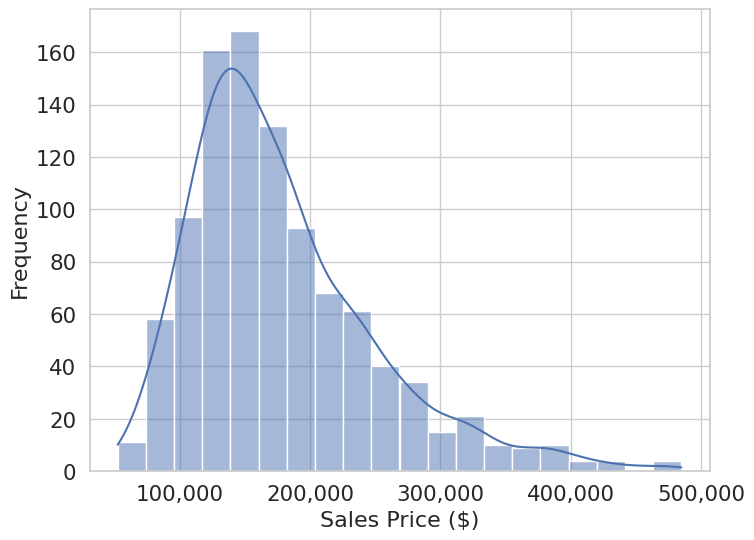

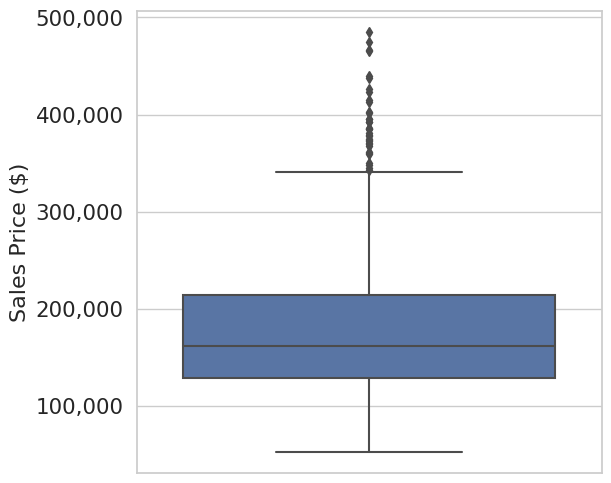

In [ ]:
# Print summary statistics for sales price
print(df['SalePrice'].describe())

# Draw histogram
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df['SalePrice'], bins=20, kde=True)
plt.xlabel("Sales Price ($)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: "{:,}".format(int(x)))) # Format the x-axis tick labels with commas
plt.show()
plt.close()

# Draw boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
sns.boxplot(df['SalePrice'])
plt.ylabel("Sales Price ($)", fontsize=16)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: "{:,}".format(int(x)))) # Format the x-axis tick labels with commas
plt.xticks([]) # remove x axis ticks
plt.show()
plt.close()

#Pre-processing

### Missing Values
Missing values in our dataset impact the predictive power of our model. Additionally, some missing entries in our dataset actually indicate some useful information, as explained further on.

In [ ]:
df.replace('?', np.nan, inplace=True)

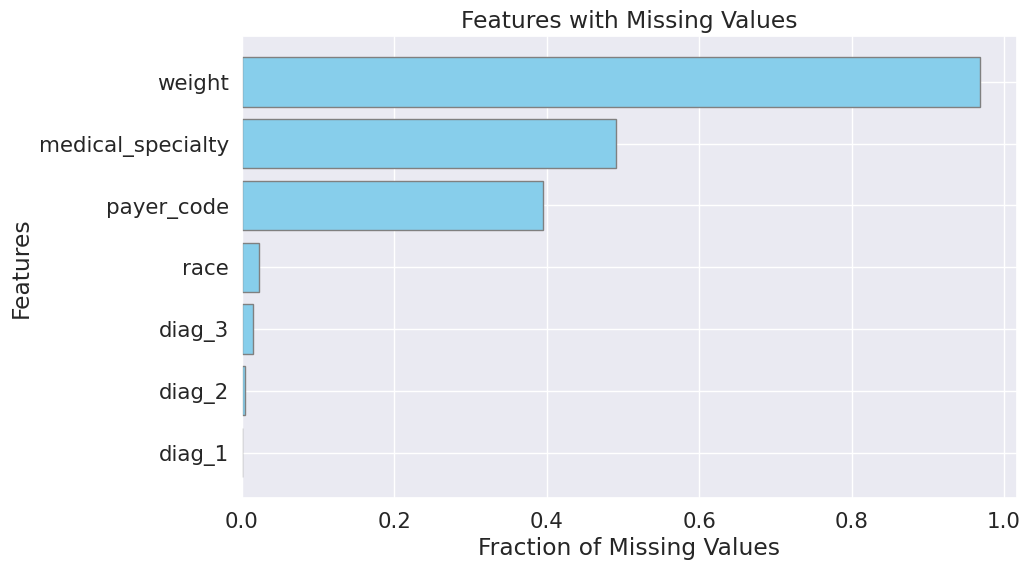

In [ ]:
feature_nan = df.isna().sum() / df.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df = df.drop(columns = ['weight','payer_code', 'diag_1', 'diag_2', 'diag_3'])
df = df.dropna()

##Mapping variables

Variables with non-numerical values may be either ordinal or nominal. Ordinal variables represent values that have an inherent order, and are thus mapped to integer values "1, 2, 3.." whereas nominal variables do not have an order, and thus are encoded, to give each variable value an equal weightage.

### Apply Ordinal Mapping to Relevant Features


In [ ]:
# Define the ordinal mapping
ordinal_mapping = {
    'Reg': 1,
    'IR1': 2,
    'IR2': 3,
    'IR3': 4,
    'NaN': 0,

    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,

    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,

    'GLQ': 6,  # Good Living Quarters
    'ALQ': 5,  # Average Living Quarters
    'BLQ': 4,  # Below Average Living Quarters
    'Rec': 3,  # Average Rec Room
    'LwQ': 2,  # Low Quality
    'Unf': 1,  # Unfinished

    'Typ': 7,   # Typical Functionality
    'Min1': 6,  # Minor Deductions 1
    'Min2': 5,  # Minor Deductions 2
    'Mod': 4,   # Moderate Deductions
    'Maj1': 3,  # Major Deductions 1
    'Maj2': 2,  # Major Deductions 2
    'Sev': 1,   # Severely Damaged
    'Sal': 0,   # Salvage only

    'Fin': 3,  # Finished
    'RFn': 2,  # Rough Finished
    'Unf': 1,  # Unfinished

    'GdPrv': 4,  # Good Privacy
    'MnPrv': 3,  # Minimum Privacy
    'GdWo': 2,   # Good Wood
    'MnWw': 1,   # Minimum Wood/Wire

    'Gtl': 3,
    'Mod': 2,
    'Sev': 1
}



# List of columns to apply ordinal mapping to
columns_to_map = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                  'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'GarageYrBlt']

# Function to apply ordinal mapping to a column
def apply_ordinal_mapping(column, mapping):
    return column.map(mapping)

# Apply ordinal mapping to selected columns
for column in columns_to_map:
    df[column] = apply_ordinal_mapping(df[column], ordinal_mapping)

df[columns_to_map] = df[columns_to_map].fillna(0)

### Convert Non-Ordinal Features to One-Hot-Encoding



In [ ]:
# Find remaining features of string type
string_columns = [col for col in df.columns if df[col].dtype == 'object']

# Convert string columns to one-hot encodings
df = pd.get_dummies(df, columns=string_columns, prefix=string_columns)

df

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,6,25,1,1,41,0,1,0,0,0,...,1,1,0,0,1,1,0,0,0,1
9,3,3,4,12,33,3,18,0,0,0,...,1,1,0,1,0,0,1,0,0,1
12,1,3,7,7,60,0,15,0,1,0,...,1,1,0,1,0,0,1,1,0,0
13,1,6,7,10,55,1,31,0,0,0,...,1,1,0,0,1,0,1,0,0,1
17,1,1,7,3,29,0,11,0,0,0,...,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,2,6,7,6,46,5,14,0,0,1,...,1,1,0,1,0,0,1,0,0,1
101743,1,13,7,3,45,0,26,1,0,1,...,1,1,0,1,0,0,1,0,0,1
101747,1,22,7,8,51,6,19,0,0,0,...,1,1,0,0,1,0,1,0,1,0
101749,3,6,1,3,27,1,29,0,1,0,...,1,1,0,1,0,0,1,0,0,1


### Drop Highly Correlated Features

Correlated features essentially convey the same information, which can lead to model redundancy. Removing them reduces the complexity of the model and can make it more interpretable.


In [ ]:
# Set the correlation threshold for considering features as highly correlated
correlation_threshold = 0.95

# Iterate through pairs of features and measure the correlation
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        feature1 = df.columns[i]
        feature2 = df.columns[j]
        correlation = df[feature1].corr(df[feature2])

        # Check if the correlation is above the threshold
        if abs(correlation) > correlation_threshold:
            print(f'High correlation between {feature1} and {feature2} (Correlation: {correlation:.2f})')

            # # Plot the highly correlated features
            # sns.scatterplot(x=feature1, y=feature2, data=df)
            # plt.xlabel(feature1)
            # plt.ylabel(feature2)
            # plt.title(f'Scatter Plot of {feature1} vs. {feature2}')
            # plt.show()

High correlation between gender_Female and gender_Male (Correlation: -1.00)
High correlation between nateglinide_No and nateglinide_Steady (Correlation: -0.98)
High correlation between chlorpropamide_No and chlorpropamide_Steady (Correlation: -0.95)
High correlation between tolbutamide_No and tolbutamide_Steady (Correlation: -1.00)
High correlation between pioglitazone_No and pioglitazone_Steady (Correlation: -0.97)
High correlation between rosiglitazone_No and rosiglitazone_Steady (Correlation: -0.98)
High correlation between acarbose_No and acarbose_Steady (Correlation: -0.97)
High correlation between miglitol_No and miglitol_Steady (Correlation: -0.96)
High correlation between troglitazone_No and troglitazone_Steady (Correlation: -1.00)
High correlation between tolazamide_No and tolazamide_Steady (Correlation: -1.00)
High correlation between glyburide-metformin_No and glyburide-metformin_Steady (Correlation: -0.99)
High correlation between glipizide-metformin_No and glipizide-metfor

Several of the above variables, from their descriptions, convey the same information (like garageQual and GarageCond), so we remove them.

In [ ]:
df = df.drop(columns = 'GarageCond')
df = df.drop(columns = 'Street_Grvl')
df = df.drop(columns = 'CentralAir_N')
df = df.drop(columns = 'Exterior2nd_CBlock')
df = df.drop(columns = 'Exterior2nd_CmentBd')
df = df.drop(columns = 'Exterior2nd_MetalSd')
df = df.drop(columns = 'Exterior2nd_VinylSd')
df = df.drop(columns = 'SaleCondition_Partial')


In [ ]:
df

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,20,63.0,7500,1,3,7,5,2004,2005,120.0,...,0,0,0,0,1,0,0,0,0,1
1,50,NaN,7015,2,3,5,4,1950,1950,161.0,...,0,0,0,0,1,0,0,0,0,1
2,20,80.0,9650,1,3,6,5,1977,1977,360.0,...,0,0,0,0,1,0,0,0,0,1
3,20,75.0,9000,1,3,5,5,1954,1954,0.0,...,0,0,0,0,1,0,0,0,1,0
4,60,88.0,12665,2,3,8,5,2005,2006,245.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20,245.5,9286,2,2,5,7,1977,1989,0.0,...,0,0,0,0,1,0,0,0,0,1
996,160,21.0,2001,1,3,4,5,1970,1970,80.0,...,0,0,0,0,1,0,0,0,0,1
997,30,60.0,8967,1,3,5,2,1920,1950,0.0,...,0,0,0,0,1,1,0,0,0,0
998,50,50.0,5000,1,3,5,6,1924,1950,0.0,...,0,0,0,0,1,0,0,0,0,1


#Modelling

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 999
Data columns (total 216 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    MSSubClass             int64  
 1    LotFrontage            float64
 2    LotArea                int64  
 3    LotShape               int64  
 4    LandSlope              int64  
 5    OverallQual            int64  
 6    OverallCond            int64  
 7    YearBuilt              int64  
 8    YearRemodAdd           int64  
 9    MasVnrArea             float64
 10   ExterQual              int64  
 11   ExterCond              int64  
 12   BsmtQual               float64
 13   BsmtCond               float64
 14   BsmtExposure           int64  
 15   BsmtFinType1           int64  
 16   BsmtFinSF1             int64  
 17   BsmtFinType2           int64  
 18   BsmtFinSF2             int64  
 19   BsmtUnfSF              int64  
 20   TotalBsmtSF            int64  
 21   HeatingQC              int64  
 22   

###Step-wise selection

To find a subset of variables that produce the best model, we use a type of stepwise variable selection method called forward selection, that starts with an empty model and adds variables to the model one-by-one based on which variable increases accuracy most, and stops adding when the model stops improving significantly.

In [ ]:
from sklearn.model_selection import train_test_split

def forward_subset_selection(X,y,my_test_size=0.5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, random_state=3)

  def processSubset(feature_set, X_train, y_train, X_test, y_test):
      # Fit model on feature_set and calculate RSS
      model = sm.OLS(y_train,X_train[list(feature_set)])
      regr = model.fit()
      RMSE = np.sqrt( np.mean((regr.predict(X_test[list(feature_set)]) - y_test) ** 2) )
      return {'features':feature_set, 'model':regr, 'RMSE':RMSE}

  def forward(predictors, X_train, y_train, X_test, y_test):

      # Pull out predictors we still need to process
      remaining_predictors = [p for p in X_train.columns if p not in predictors]

      results = []

      for p in remaining_predictors:
          results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))

      # Wrap everything up in a nice dataframe
      models = pd.DataFrame(results)

      # Choose the model with the minimum RMSE
      best_model = models.loc[models['RMSE'].astype(float).idxmin()]

      # Return the best model, along with some other useful information about the model
      return best_model

  models_train = pd.DataFrame(columns=['RMSE', 'model'])

  predictors = []

  for i in range(1,len(X.columns)+1):
      models_train.loc[i] = forward(predictors, X_train, y_train, X_test, y_test)
      predictors = models_train.loc[i]['model'].model.exog_names

  plt.plot(models_train['RMSE'],'ob')
  plt.xlabel('# Predictors')
  plt.ylabel('RMSE')

  best_n_vars = models_train['RMSE'].astype(float).idxmin()
  best_RMSE = models_train['RMSE'].min()
  #Note: the plus 1 accounts for starting at 0 vs at 1 in the indexing
  plt.plot(best_n_vars, best_RMSE, 'or');
  plt.title(f"Best #Vars = {best_n_vars}")
  print("==========")
  print(f"Best number of vars found: {best_n_vars}")
  print(f"Best model found: {models_train.loc[best_n_vars]['model'].model.exog_names}")



In [ ]:
Y = df['SalePrice']
X = df.drop('SalePrice', axis = 1)

----Models tried in this round----
                     features       RMSE
0               [MSSubClass]   7.161371
1              [LotFrontage]   3.604149
2                  [LotArea]   7.452244
3                 [LotShape]   4.397413
4                [LandSlope]   0.906695
..                       ...        ...
206  [SaleCondition_Abnorml]  11.627922
207  [SaleCondition_AdjLand]  12.006318
208   [SaleCondition_Alloca]  12.033642
209   [SaleCondition_Family]  11.886341
210   [SaleCondition_Normal]   5.709859

[211 rows x 2 columns]
----Models tried in this round----
                                features      RMSE
0               [YearBuilt, MSSubClass]  0.304871
1              [YearBuilt, LotFrontage]  0.286524
2                  [YearBuilt, LotArea]  0.289824
3                 [YearBuilt, LotShape]  0.302168
4                [YearBuilt, LandSlope]  0.306211
..                                  ...       ...
205  [YearBuilt, SaleCondition_Abnorml]  0.301615
206  [YearBuilt, SaleCon

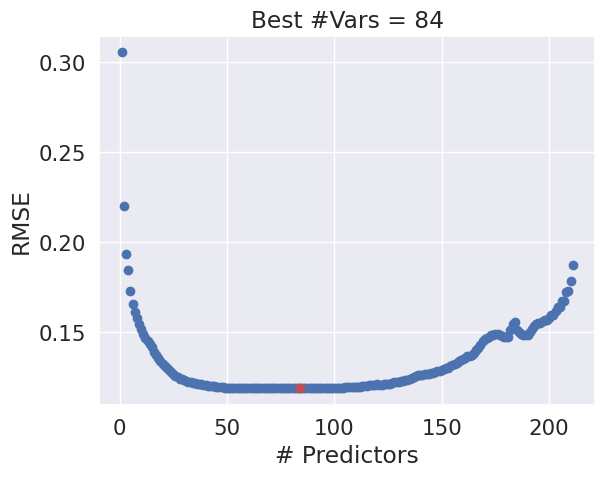

In [ ]:
forward_subset_selection(X,Y)

In [ ]:
X = X[['YearBuilt', 'GrLivArea', 'OverallQual', 'YrSold', 'GarageArea', 'Fireplaces', 'MSZoning_RM', 'BsmtFullBath', 'Condition1_Norm', 'SaleCondition_Abnorml', 'BsmtQual', 'BldgType_Twnhs', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor', 'OverallCond', 'Neighborhood_Edwards', 'HeatingQC', 'LandContour_Bnk', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'BsmtFinType1', 'SaleType_New', 'BedroomAbvGr', 'LotConfig_CulDSac', 'Condition1_PosN', 'Functional', 'ScreenPorch', 'WoodDeckSF', 'Neighborhood_Mitchel', 'Heating_Grav', 'SaleType_ConLw', 'Exterior1st_WdShing', 'Foundation_BrkTil', 'Neighborhood_BrkSide', 'Exterior1st_AsbShng', 'Exterior1st_BrkComm', 'ExterQual', 'GarageType_BuiltIn', 'GarageFinish', 'Condition1_Artery', 'Neighborhood_Somerst', 'RoofStyle_Gable', 'Utilities_AllPub', 'LotConfig_FR3', 'Condition1_RRNn', 'MiscFeature_Othr', 'Exterior2nd_HdBoard', '3SsnPorch', 'Exterior2nd_AsphShn', 'Exterior1st_MetalSd', 'LotShape', 'Neighborhood_SWISU', 'GarageType_Detchd', 'Exterior2nd_ImStucc', 'Neighborhood_IDOTRR', 'GarageType_CarPort', 'Condition1_RRAe', 'OpenPorchSF', 'Condition1_RRNe', 'Electrical_FuseP', 'Electrical_SBrkr', 'MasVnrType_BrkCmn', 'Neighborhood_Sawyer', 'Exterior1st_AsphShn', 'GarageYrBlt', 'Neighborhood_Blueste', 'Neighborhood_Veenker', 'Condition2_PosN', 'RoofMatl_Roll', 'RoofMatl_WdShake', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Foundation_Wood', 'Heating_OthW', 'Electrical_Mix', 'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI', 'SaleCondition_Alloca', 'Exterior2nd_AsbShng', 'LotConfig_Corner', 'LotFrontage']]

In [ ]:
# ols model with intercept

Y_and_all_X_model = sm.OLS(Y, X)

# fitted model and summary
Y_and_all_X_results = Y_and_all_X_model.fit()
print(Y_and_all_X_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     72.92
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          9.26e-298
Time:                        00:48:37   Log-Likelihood:                 513.86
No. Observations:                 809   AIC:                            -861.7
Df Residuals:                     726   BIC:                            -472.0
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
YearBuilt                 0.00

###Residual Plot

It shows random scatter of residuals with respect to the dependent variable and indicates the assumptions of a linear model are satisfied.

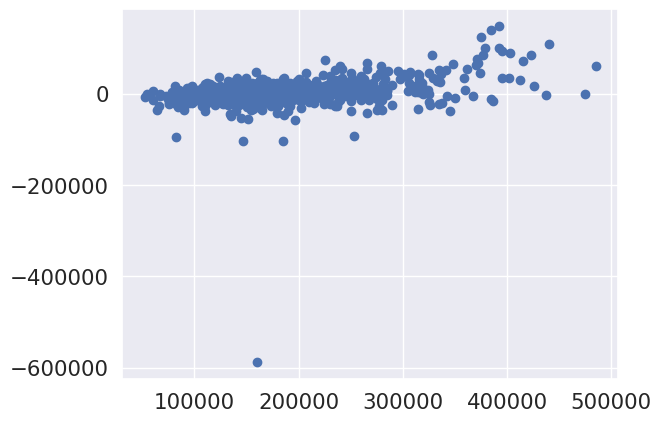

In [ ]:
Y_pred = Y_and_all_X_results.predict(X)
Residuals = np.expm1(Y)-np.expm1(Y_pred)
plt.scatter(np.expm1(Y), Residuals)

#Testing


In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Housing_Data_Test.csv')

In [ ]:
df1 = df1.drop('Unnamed: 0', axis=1)
df1 = df1.drop('Id', axis=1)
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
2,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal
3,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
4,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml


### Missing Values
Fraction of Nan in Features

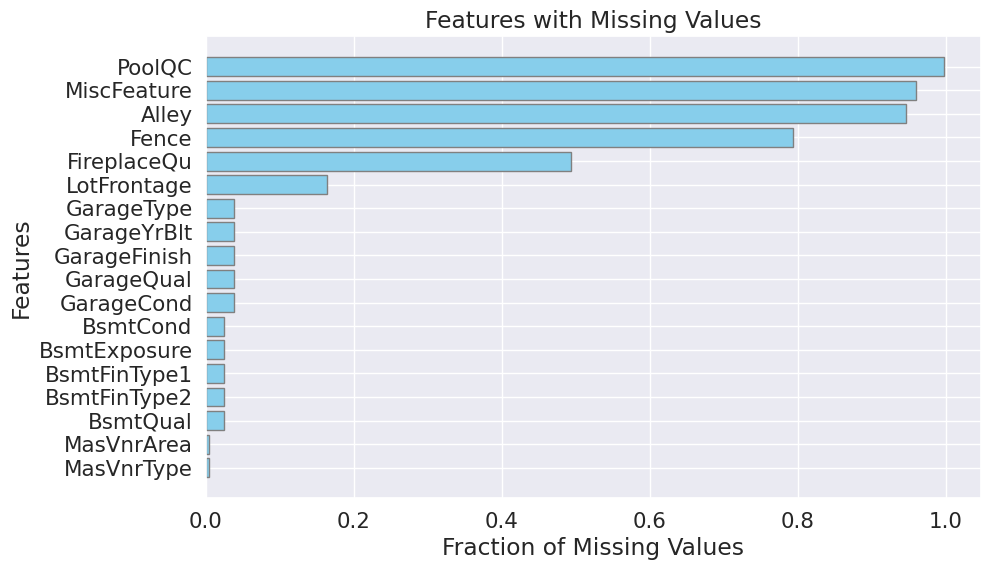

In [ ]:
feature_nan = df1.isna().sum() / df1.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

### Map NaN to "NaN" in Specific Columns


In [ ]:
# Specify the columns where you want to replace NaN with a string
columns_to_replace_nan = ['MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageFinish', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1']

# Replace NaN values with a string (e.g., 'NaN') in the specified columns
df1[columns_to_replace_nan] = df1[columns_to_replace_nan].fillna('NaN')

### Apply Ordinal Mapping to Relevant Features

In [ ]:
# Define the ordinal mapping
ordinal_mapping = {
    'Reg': 1,
    'IR1': 2,
    'IR2': 3,
    'IR3': 4,
    'NaN': 0,

    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,

    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,

    'GLQ': 6,  # Good Living Quarters
    'ALQ': 5,  # Average Living Quarters
    'BLQ': 4,  # Below Average Living Quarters
    'Rec': 3,  # Average Rec Room
    'LwQ': 2,  # Low Quality
    'Unf': 1,  # Unfinished

    'Typ': 7,   # Typical Functionality
    'Min1': 6,  # Minor Deductions 1
    'Min2': 5,  # Minor Deductions 2
    'Mod': 4,   # Moderate Deductions
    'Maj1': 3,  # Major Deductions 1
    'Maj2': 2,  # Major Deductions 2
    'Sev': 1,   # Severely Damaged
    'Sal': 0,   # Salvage only

    'Fin': 3,  # Finished
    'RFn': 2,  # Rough Finished
    'Unf': 1,  # Unfinished

    'GdPrv': 4,  # Good Privacy
    'MnPrv': 3,  # Minimum Privacy
    'GdWo': 2,   # Good Wood
    'MnWw': 1,   # Minimum Wood/Wire

    'Gtl': 3,
    'Mod': 2,
    'Sev': 1
}



# List of columns to apply ordinal mapping to
columns_to_map = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                  'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'GarageYrBlt']

# Function to apply ordinal mapping to a column
def apply_ordinal_mapping(column, mapping):
    return column.map(mapping)

# Apply ordinal mapping to selected columns
for column in columns_to_map:
    df1[column] = apply_ordinal_mapping(df1[column], ordinal_mapping)

df1[columns_to_map] = df1[columns_to_map].fillna(0)

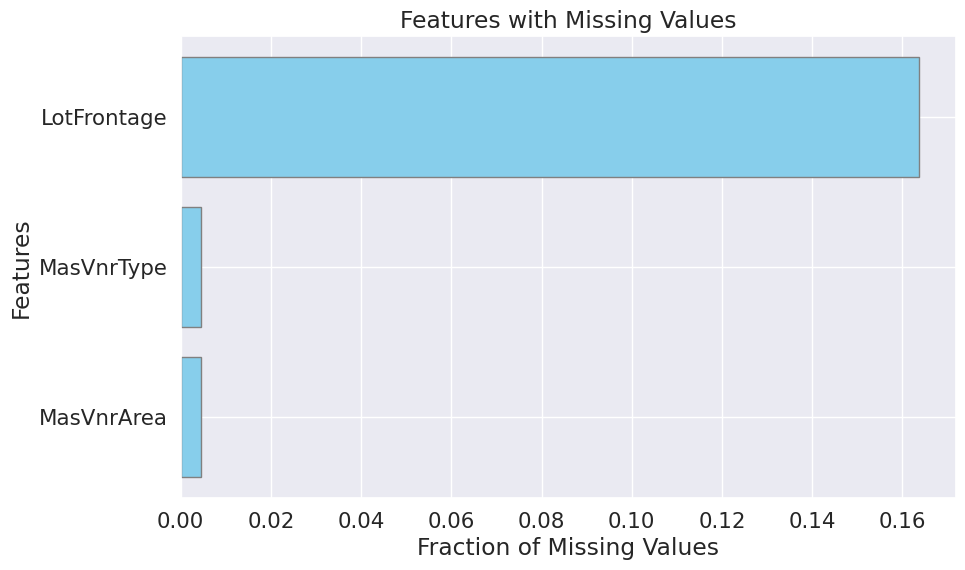

In [ ]:
feature_nan = df1.isna().sum() / df1.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

### Convert Non-Ordinal String to One-Hot-Encoding


In [ ]:
# Find remaining features of string type
string_columns = [col for col in df1.columns if df1[col].dtype == 'object']

# Convert string columns to one-hot encodings
df1 = pd.get_dummies(df1, columns=string_columns, prefix=string_columns)

df1

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,9600,1,3,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
1,50,51.0,6120,1,3,7,5,1931,1950,0.0,...,0,0,0,1,1,0,0,0,0,0
2,90,72.0,10791,1,3,4,5,1967,1967,0.0,...,0,0,0,1,0,0,0,0,1,0
3,20,66.0,13695,1,3,5,5,2004,2004,0.0,...,0,0,0,1,0,0,0,0,1,0
4,20,70.0,7560,1,3,5,6,1958,1965,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,60,62.0,7917,1,3,6,5,1999,2000,0.0,...,0,0,0,1,0,0,0,0,1,0
442,20,85.0,13175,1,3,6,6,1978,1988,119.0,...,0,0,0,1,0,0,0,0,1,0
443,70,66.0,9042,1,3,7,9,1941,2006,0.0,...,0,0,0,1,0,0,0,0,1,0
444,20,68.0,9717,1,3,5,6,1950,1996,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
predictions = Y_and_all_X_results.predict(X_test).fillna(0)
predictions = np.expm1(predictions)

#convert the predictions to a LIST of POSITIVE INTEGERS (do not submit decimals!)
list_predictions = predictions.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[224710, 157990, 117830, 126009, 139503, 263645, 83202, 173029, 145648, 174710, 146680, 269322, 284435, 185682, 158290, 464915, 120541, 132647, 208053, 90252, 130285, 210881, 163799, 188678, 114166, 106581, 193428, 192879, 179204, 120735, 122361, 119653, 357089, 260621, 173988, 168165, 116625, 138026, 214259, 208161, 150445, 190030, 192503, 101068, 134140, 115827, 131566, 245163, 269516, 200167, 258119, 145285, 120975, 182594, 171167, 188203, 118723, 215612, 140501, 112082, 114399, 111233, 151448, 132317, 208758, 229755, 179752, 184390, 278548, 91844, 229667, 244924, 84480, 235888, 154809, 223047, 107183, 192232, 108699, 151246, 152581, 160785, 223016, 238565, 103459, 242343, 257963, 137912, 213815, 172403, 160213, 195902, 372081, 135820, 138018, 90381, 132116, 203302, 153880, 93644, 229278, 159181, 327316, 194704, 119875, 129737, 214560, 155144, 266532, 313832, 200678, 206427, 85183, 135723, 112938, 140762, 144911, 212858, 258330, 299244, 267637, 197571, 311223, 153099, 117442, 190179

#Result

The RSME of this model for the test set is 23561

#Overfitting vs. Underfitting
The analysis below shows how test error and training error behave as model complexity is increased, represented in this case by the number of variables used in the model. The code below builds models while increasing the number of variables in each model by one, and finds an estimate of the test and train error. This is then visualised as a function of the number of variables. Initially, both test and train error are high, and the model is underfitted. As the model complexity increases, both training and test error decrease, as a result of the model correctly estimating the relationship between dependent and independent variables. As the model complexity contuinues to increase, training error keeps decreasing steadily, but test error goes up sharply, as the model is now overfitting to the training data, and no longer accurately estimating the true relationship between dependent and independent variables.

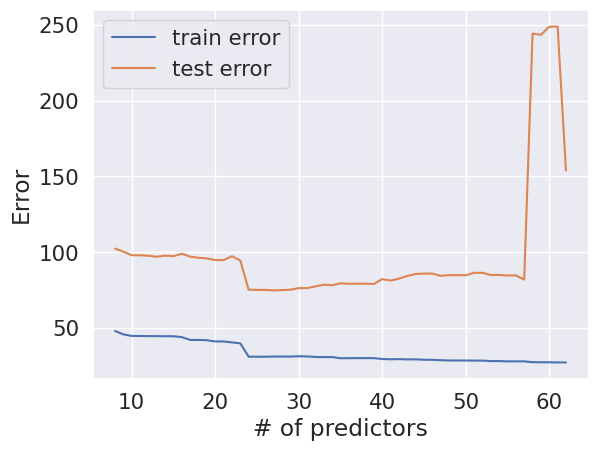

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(df.drop(['SalePrice'], axis = 1), Y, test_size = 0.7)
train_error = []
test_error = []
k = range(8,63)

for i in k:

  #reg = KNeighborsRegressor(n_neighbors=i)
  reg = sm.OLS(y_train, X_train.iloc[:,range(0,i)])

  reg = reg.fit()

  predict_train = reg.predict(X_train.iloc[:,range(0,i)])
  predict_test = reg.predict(X_test.iloc[:,range(0,i)])

  train_error.append(sum(abs(y_train-predict_train)))
  test_error.append(sum(abs(y_test-predict_test)))

  #plt.scatter(reg.predict(X_test), y_test)
  #plt.plot(y_test, y_test)
  #plt.title('k = %s'%(i))
  #plt.show()


plt.plot(k, train_error, label = 'train error')
plt.plot(k, test_error, label = 'test error')
plt.xlabel('# of predictors')
plt.ylabel('Error')
plt.legend()